<a href="https://colab.research.google.com/github/safouan90/Interview-Exercise-Market/blob/main/InterviewExFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Practical Interview**
### **STEP I : DATA PROCESSING** 



Allowed python libraries for this exercise

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import t
from scipy.stats import chi2

### **Data Import**
To make this code **reproducible**, which means that it can be executed everywhere, I use a accessible link to call **data_market.json** that I have dowloaded previously on a GitHub repository.

In [5]:
MarketDf = pd.read_json('https://raw.githubusercontent.com/safouan90/Interview-Exercise-Market/main/market_data.json')

### **Tidy Data**

First impression with **Market_data.json**

In [ ]:
MarketDf.head()

This data contains seven stocks types, with a diffrent starting Date. The values of each record are nested in a dict which makes it more tedious for extracting tasks. In the next chunks I will investigate the length of each stocks types to construct a common indexing for all stocks based on Dates of most recorded stocks type.

In [7]:
#To view market_data columns

MarketDf.columns

Index(['AAPL', 'GLD', 'GOOG', 'IBM', 'IVV', 'SPX', 'NDX'], dtype='object')

In [8]:
#Market stocks real length after dropping NaN created by DataFrame importation

AAPL = MarketDf['AAPL'].dropna()
GLD  = MarketDf['GLD'].dropna()  
GOOG = MarketDf['GOOG'].dropna()
IBM  = MarketDf['IBM'].dropna()
IVV  = MarketDf['IVV'].dropna()
SPX  = MarketDf['SPX'].dropna()
NDX  = MarketDf['NDX'].dropna()

#This chunk could be executed using a loop on MarketDf.columns and eval function, but I write it in this way to make it more readable

In [9]:
#Computing length of each stock market

aaplLen = len(AAPL)
gldLen  = len(GLD)
googLen = len(GOOG)
ibmLen  = len(IBM)
ivvLen  = len(IVV)
spxLen  = len(SPX)
ndxLen  = len(NDX)

In [10]:
#Replacing index stock series with the range from 0 to the length of each series to avoid problems when looping

AAPL =  pd.Series(AAPL.values , index = np.arange(0, aaplLen))
GLD  =  pd.Series(GLD.values  , index = np.arange(0, gldLen))  
GOOG =  pd.Series(GOOG.values , index = np.arange(0, googLen))
IBM  =  pd.Series(IBM.values  , index = np.arange(0, ibmLen))
IVV  =  pd.Series(IVV.values  , index = np.arange(0, ivvLen))
SPX  =  pd.Series(SPX.values  , index = np.arange(0, spxLen))
NDX  =  pd.Series(NDX.values  , index = np.arange(0, ndxLen))

In [11]:
#Making a list starting and ending date for each stock type

lstStartEnd = [
               
 [ AAPL[0]['Date'] , AAPL[aaplLen - 1]['Date'] , aaplLen ] ,
 [ GLD[0]['Date']  , GLD[gldLen - 1]['Date']   , gldLen  ] ,
 [ GOOG[0]['Date'] , GOOG[googLen - 1]['Date'] , googLen ] , 
 [ IBM[0]['Date']  , IBM[ibmLen - 1]['Date']   , ibmLen  ] , 
 [ IVV[0]['Date']  , IVV[ivvLen - 1]['Date']   , ivvLen  ] , 
 [ SPX[0]['Date']  , SPX[spxLen - 1]['Date']   , spxLen  ] , 
 [ NDX[0]['Date']  , NDX[ndxLen - 1]['Date']   , ndxLen  ]
              
              ] 

#Constructing a dataframe for more visibility

StartEndStocks = pd.DataFrame( columns = ['Start_Date', 'End_Date', 'Records' ], 
                               index   = MarketDf.columns           , 
                               data    =  lstStartEnd ) 

#viewing results

StartEndStocks       

,Start_Date,End_Date,Records
AAPL,1984-09-07,2021-01-22,9167
GLD,2005-02-25,2021-01-22,4004
GOOG,2004-08-19,2021-01-22,4136
IBM,1962-01-02,2021-01-22,14859
IVV,2005-02-25,2021-01-22,4004
SPX,1789-05-01,2021-01-22,38364
NDX,1985-10-01,2021-01-22,8901


It seems that SPX is the most recorded stock type, and its period recording contains all other stock types. So, it is a good indexing reference for all stocks.

For quering Financial data, in a scalable and efficient way, all records from all stocks, should be aligned with a indexing date. In our case, date of SPX is the chosen Index.

In next chunks, I will extract relevant data (Date & Close price) and indexing them in one rectangular data following a unified date records.

In [12]:
#Extracting some data with compherension list, which more efficient than looping market_data.json with for or while loop

lstDateClose_AAPL = [    [ AAPL[i]['Date'] ,  AAPL[i]['Close']]     for i in range(0, aaplLen) ]
lstDateClose_GLD  = [    [ GLD[i]['Date']  ,  GLD[i]['Close'] ]     for i in range(0, gldLen)  ]
lstDateClose_GOOG = [    [ GOOG[i]['Date'] ,  GOOG[i]['Close']]     for i in range(0, googLen) ]
lstDateClose_IBM  = [    [ IBM[i]['Date']  ,  IBM[i]['Close'] ]     for i in range(0, ibmLen)  ]
lstDateClose_IVV  = [    [ IVV[i]['Date']  ,  IVV[i]['Close'] ]     for i in range(0, ivvLen)  ]
lstDateClose_SPX  = [    [ SPX[i]['Date']  ,  SPX[i]['Close'] ]     for i in range(0, spxLen)  ]
lstDateClose_NDX  = [    [ NDX[i]['Date']  ,  NDX[i]['Close'] ]     for i in range(0, ndxLen)  ]

In [13]:
#Creating a DataFrame for each stock type

AAPLdF = pd.DataFrame( columns = [ 'Date', 'AAPL' ],  data = lstDateClose_AAPL ) 
GLDdF  = pd.DataFrame( columns = [ 'Date', 'GLD'  ],  data = lstDateClose_GLD  ) 
GOOGF  = pd.DataFrame( columns = [ 'Date', 'GOOG' ],  data = lstDateClose_GOOG ) 
IBMdF  = pd.DataFrame( columns = [ 'Date', 'IBM'  ],  data = lstDateClose_IBM  )
IVVdF  = pd.DataFrame( columns = [ 'Date', 'IVV'  ],  data = lstDateClose_IVV  ) 
SPXdF  = pd.DataFrame( columns = [ 'Date', 'SPX'  ],  data = lstDateClose_SPX  ) 
NDXdF  = pd.DataFrame( columns = [ 'Date', 'NDX'  ],  data = lstDateClose_NDX  ) 


AAPLdF['Date'] = pd.to_datetime(AAPLdF['Date'])
GLDdF['Date']  = pd.to_datetime(GLDdF['Date'])
GOOGF['Date']  = pd.to_datetime(GOOGF['Date'])
IBMdF['Date']  = pd.to_datetime(IBMdF['Date'])
IVVdF['Date']  = pd.to_datetime(IVVdF['Date'])
SPXdF['Date']  = pd.to_datetime(SPXdF['Date'])
NDXdF['Date']  = pd.to_datetime(NDXdF['Date'])


#Setting index to date of each stocks DataFrame

AAPLdF = AAPLdF.set_index('Date')
GLDdF  = GLDdF.set_index('Date')
GOOGF  = GOOGF.set_index('Date')
IBMdF  = IBMdF.set_index('Date')
IVVdF  = IVVdF.set_index('Date')
SPXdF  = SPXdF.set_index('Date')
NDXdF  = NDXdF.set_index('Date')

In [14]:
#To avoid errors when querying dates, I will generate a more general indexing list that contains all days between Start date
#and ending date of SPX 

genIn    = pd.date_range(start='1789-05-01', end='2021-01-22')


#Gathering all stock prices in one scalable data according to genInStr

ScalableMarketDf = pd.concat([AAPLdF, GLDdF, GOOGF, IBMdF, IVVdF, SPXdF, NDXdF], axis=1).reindex(genIn)



#Using our built DataFrame, we can query safely and efficiently Market Data, with Pandas's arguments 

ScalableMarketDf['2021-01-01':'2021-01-20'][['GOOG','AAPL']]

#Martin Luther King Day: lundi, 18 janvier 2021, our data contains also all days when markets are closed represented by NaN

,GOOG,AAPL
2021-01-01,NaN,NaN
2021-01-02,NaN,NaN
2021-01-03,NaN,NaN
2021-01-04,1726.13,129.41
2021-01-05,1740.05,131.01
2021-01-06,1722.88,126.60
2021-01-07,1774.34,130.92
2021-01-08,1797.83,132.05
2021-01-09,NaN,NaN
2021-01-10,NaN,NaN


### **STEP II : DATA WRANGLING AND VISUALIZATION** 

In [15]:
SelectedDta = ScalableMarketDf['2017-01-01':'2020-12-31'][['GOOG','AAPL']]
SelectedDta

,GOOG,AAPL
2017-01-01,NaN,NaN
2017-01-02,NaN,NaN
2017-01-03,808.01,27.503
2017-01-04,807.77,27.473
2017-01-05,813.02,27.614
...,...,...
2020-12-27,NaN,NaN
2020-12-28,1773.96,136.690
2020-12-29,1757.76,134.870
2020-12-30,1736.25,133.720


In our data, there is two sources of missing values, the first one comes from days when Stock markets are closed, including weed-ends, public holidays, etc. Second is related to disponible records of each stock in a time window.

When handling missing value, in our case, we should pay attention, to not affect some estimations like means, medians or variances. So, I think that it is more safe to drop missing values when dealing with stocks individualy.

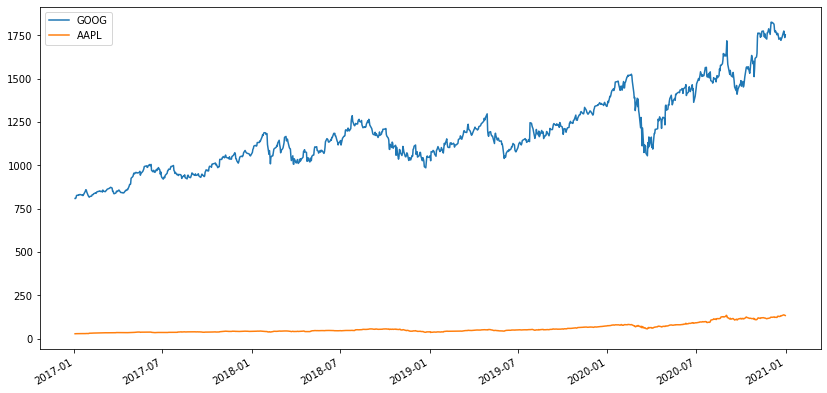

In [16]:
#Dropping missing values

SelectedDta = SelectedDta.dropna()

#Stocks prices plotting 

SelectedDta.plot(figsize = (14,7))

### **STEP III : GET TO KNOW DATA** 

In [17]:
Returns = np.log(SelectedDta/SelectedDta.shift(1))
Returns

,GOOG,AAPL
2017-01-03,NaN,NaN
2017-01-04,-0.000297,-0.001091
2017-01-05,0.006478,0.005119
2017-01-06,0.014882,0.010913
2017-01-09,0.002384,0.009128
...,...,...
2020-12-24,0.003425,0.007683
2020-12-28,0.022691,0.035141
2020-12-29,-0.009174,-0.013404
2020-12-30,-0.012313,-0.008563


In [18]:
#Mean of daily returns

ReturnsMean = Returns.mean(axis = 0)
ReturnsMean

GOOG    0.000770
AAPL    0.001564
dtype: float64

In [19]:
#Standard deviation of daily returns

#Without covariance values

ReturnsStd = Returns.std(axis = 0)
ReturnsStd

GOOG    0.017482
AAPL    0.019962
dtype: float64

In [20]:
#Standard deviation of daily returns

#With covariance values

ReturnsStdM = np.sqrt(Returns.cov())
ReturnsStdM

,GOOG,AAPL
GOOG,0.017482,0.015413
AAPL,0.015413,0.019962


The average number of trading days for U.S. markets is about **252 days**

In [21]:
#Setting period at 252
T = 252

In [22]:
#Annualized means

AnnReturnsMean = ((ReturnsMean + 1)**T) - 1
AnnReturnsMean

GOOG    0.213958
AAPL    0.482759
dtype: float64

In [23]:
#Annualized standard deviations

AnnReturnsStd = ReturnsStd*np.sqrt(T)
AnnReturnsStd


GOOG    0.277514
AAPL    0.316894
dtype: float64

In [24]:
AnnReturnsStdM = ReturnsStdM*np.sqrt(T)
AnnReturnsStdM

,GOOG,AAPL
GOOG,0.277514,0.244667
AAPL,0.244667,0.316894


To build interval confident of metrics computed from returns distribution, let us assume that returns of each stock are independant and normally distributed. 

In [25]:
#Confidence Interval Building for metrics

N = len(Returns)
alpha = 1 - 0.10/2 
Tstudent = t.ppf(alpha, N-1)
ChisqInf = chi2.ppf(alpha, N-1)
ChisqSup = chi2.ppf(1 - alpha, N-1)

#Mean

BornInfMean = ReturnsMean - (Tstudent*ReturnsStd)/np.sqrt(N-1)
BornSupMean = ReturnsMean + (Tstudent*ReturnsStd)/np.sqrt(N-1)

ConfIntMean = pd.concat([ReturnsMean,BornInfMean,BornSupMean], axis=1)
ConfIntMean.columns = ['ReturnsMean','BornInfMean','BornSupMean']


#Standard deviation

BornInfSd = np.sqrt( (N*ReturnsStd**2)/ChisqInf )
BornSupSd = np.sqrt( (N*ReturnsStd**2)/ChisqSup )

ConfIntSd = pd.concat([ReturnsStd,BornInfSd,BornSupSd], axis=1)
ConfIntSd.columns = ['ReturnsStd','BornInfSd','BornSupSd']


#Confidence Interval Building for Annualize metrics


#Annualized Mean

ConfIntAnnMean =  ConfIntMean*T
ConfIntAnnMean.columns = ['AnnReturnsMean','BornInfSd','BornSupSd']

#Annualized standard deviation

ConfIntAnnSd = ConfIntSd*np.sqrt(T)
ConfIntAnnSd.columns = ['AnnReturnsStd','BornInfSd','BornSupSd']

In [26]:
ConfIntMean

,ReturnsMean,BornInfMean,BornSupMean
GOOG,0.000770,-0.000138,0.001677
AAPL,0.001564,0.000528,0.002601


In [27]:
ConfIntSd

,ReturnsStd,BornInfSd,BornSupSd
GOOG,0.017482,0.016874,0.018158
AAPL,0.019962,0.019268,0.020735


In [28]:
ConfIntAnnMean

,AnnReturnsMean,BornInfSd,BornSupSd
GOOG,0.193961,-0.034711,0.422633
AAPL,0.394212,0.133091,0.655334


In [29]:
ConfIntAnnSd

,AnnReturnsStd,BornInfSd,BornSupSd
GOOG,0.277514,0.267859,0.288251
AAPL,0.316894,0.305869,0.329155


In [30]:
#Monthly value of stocks investment

MonthlyValue = AnnReturnsMean*50/12
MonthlyValue

GOOG    0.891492
AAPL    2.011494
dtype: float64

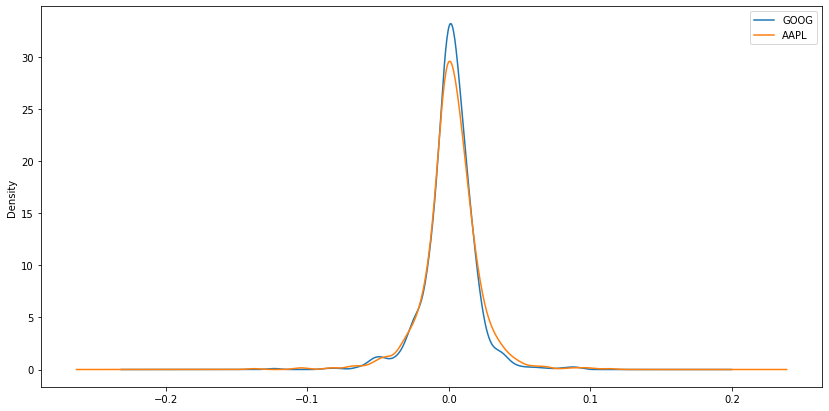

In [31]:
#Comparaison of stocks return distribution
Returns.plot.density(figsize = (14,7))

From the visualization of returns density of our Stocks, It seems that this two distributions have a long-tails, which means that we can't approach them  as a normal distributions. 

### **STEP IV : INVESTOR STRATEGIES SIMULATIONS** 

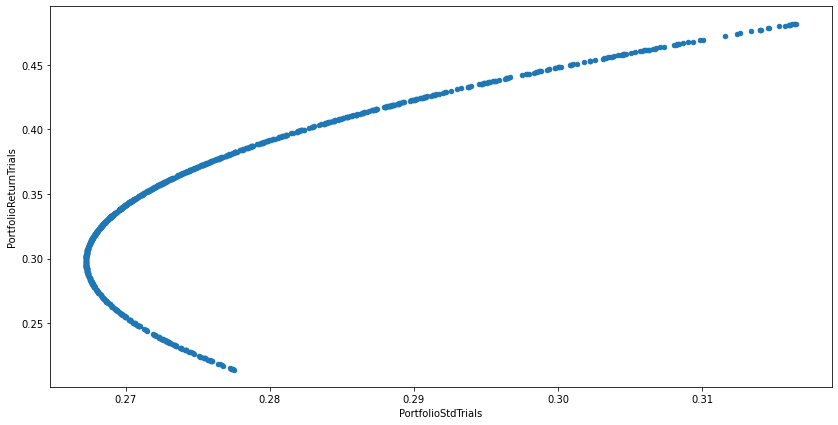

In [32]:
#A vectorized simulation

SimulationTrials = 1000

HowManyStocks = len(Returns.columns)

RandomDfNumbers = pd.DataFrame( data = np.random.rand(SimulationTrials,HowManyStocks) , columns = Returns.columns , ) 

Weights = RandomDfNumbers.div(RandomDfNumbers.sum(axis=1),axis = 0)



PortfolioReturnTrials = Weights.dot(AnnReturnsMean) 

PortfolioStdTrials = (Weights.dot(AnnReturnsStdM)*Weights).sum(axis = 1)

PortfolioTrials = pd.concat([PortfolioReturnTrials,PortfolioStdTrials], axis=1)
PortfolioTrials.columns = ['PortfolioReturnTrials','PortfolioStdTrials']

PortfolioTrials.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials', figsize = (14,7))



In [33]:
PorfolioMinStdIndex = PortfolioTrials.idxmin()['PortfolioStdTrials']
PorfolioMinReturn   = PortfolioTrials.loc[PorfolioMinStdIndex]['PortfolioReturnTrials']
PorfolioMinStd      = PortfolioTrials.loc[PorfolioMinStdIndex]['PortfolioStdTrials']


EfficientPortfolios = PortfolioTrials[ PortfolioTrials['PortfolioReturnTrials'] >= PorfolioMinReturn]
EfficientPortfolios = EfficientPortfolios.sort_values('PortfolioReturnTrials')
EfficientPortfolios

,PortfolioReturnTrials,PortfolioStdTrials
547,0.298084,0.267246
55,0.298224,0.267246
975,0.298467,0.267246
852,0.298595,0.267246
310,0.299436,0.267249
...,...,...
536,0.481247,0.316085
992,0.481552,0.316247
151,0.481819,0.316390
993,0.481949,0.316460


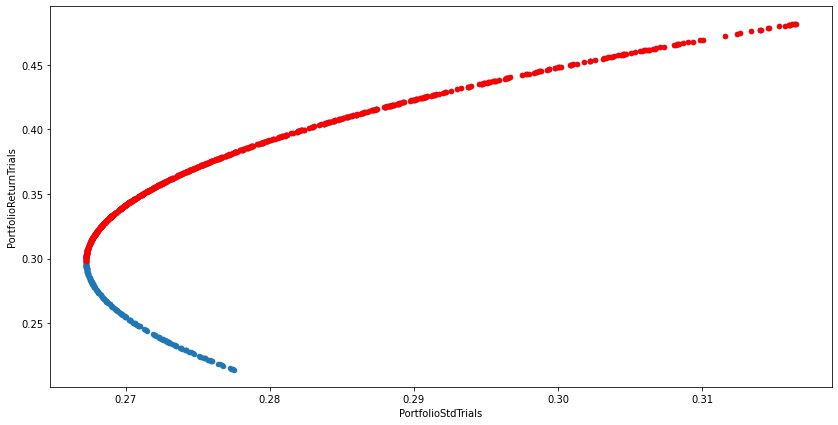

In [34]:
#Visualizing efficient portfolios

PlotFolio = PortfolioTrials.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials', figsize = (14,7))
PlotEfficientFolio = EfficientPortfolios.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials',
                                                      c = "red", figsize = (14,7), ax = PlotFolio)


In [35]:
#Combination are sorted from the less risky combination to the most risky one

EfficientAssetCombinations = Weights.loc[EfficientPortfolios.index]

#Bryan could choose of the combination on the top of this dataframe

EfficientAssetCombinations.head()

,GOOG,AAPL
547,0.687033,0.312967
55,0.686511,0.313489
975,0.685607,0.314393
852,0.685133,0.314867
310,0.682004,0.317996


In [36]:
BryanAllocation = EfficientAssetCombinations.loc[EfficientAssetCombinations.index[0]]

BryanAllocation

GOOG    0.687033
AAPL    0.312967
Name: 547, dtype: float64

In [37]:
#Naive allocation
digitRound = 3
NaiveAssetCombinations =  EfficientAssetCombinations[round(EfficientAssetCombinations.iloc[:, 0], digitRound) ==  1/HowManyStocks]

NaiveAssetCombinations

,GOOG,AAPL
219,0.500320,0.499680
235,0.500082,0.499918
680,0.499938,0.500062


In [38]:
NaiveAllocation =  NaiveAssetCombinations.loc[NaiveAssetCombinations.index[0]]

NaiveAllocation

GOOG    0.50032
AAPL    0.49968
Name: 219, dtype: float64

In [41]:
#Localisation of Naive combinations

NaiveAssetCombinationsIndex = NaiveAssetCombinations.index

# = PortfolioTrials[ PortfolioTrials['PortfolioReturnTrials'] > PorfolioMinReturn]

PorfolioNaiveReturn   = EfficientPortfolios.loc[NaiveAssetCombinationsIndex[0]]['PortfolioReturnTrials']
PorfolioNaiveStd      = EfficientPortfolios.loc[NaiveAssetCombinationsIndex[0]]['PortfolioStdTrials']

NaivePortfolios = EfficientPortfolios[ EfficientPortfolios['PortfolioReturnTrials'] >= PorfolioNaiveReturn]

In [42]:
#We could choose the first portfolio as a NaivePortfolio

NaivePortfolios.head()

,PortfolioReturnTrials,PortfolioStdTrials
219,0.348272,0.270923
235,0.348336,0.270932
680,0.348375,0.270938
537,0.349350,0.271082
678,0.349402,0.271090


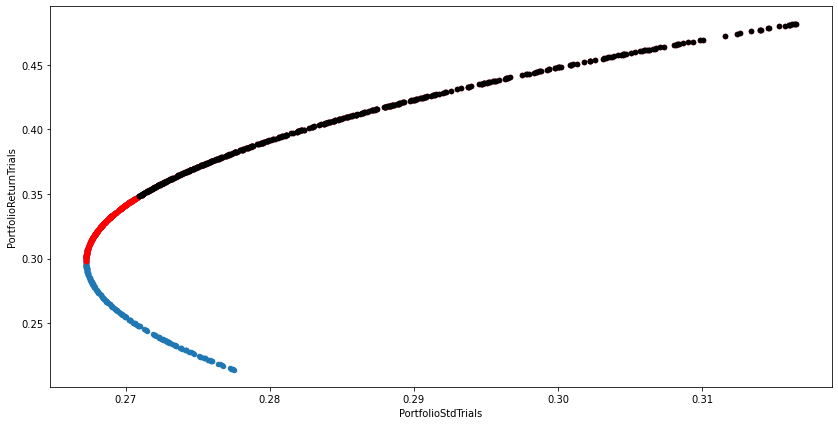

In [43]:
#Visualizing Naive portfolio limit

PlotFolio = PortfolioTrials.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials', figsize = (14,7))
PlotEfficientFolio = EfficientPortfolios.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials',
                                                      c = "red", figsize = (14,7), ax = PlotFolio)


PlotNaiveFolio = NaivePortfolios.plot.scatter(x = 'PortfolioStdTrials' , y = 'PortfolioReturnTrials',
                                                      c = "black", figsize = (14,7), ax = PlotEfficientFolio)

As we can see here, Naive portfolio is located between red and black scatters.




In [44]:
#Bryan portfolio

EfficientPortfolios[0:1]  

,PortfolioReturnTrials,PortfolioStdTrials
547,0.298084,0.267246


In [45]:
#A Naive portfolio

NaivePortfolios[0:1]

,PortfolioReturnTrials,PortfolioStdTrials
219,0.348272,0.270923


My allocation is efficient as well as Naive allocation because the two allocations belong to EfficientPortfolios data, as seen in chunks before.

In this case, it will depends on how we approach our risk level.

Each Individual or client have its own preferences of taking risk for additional return gain.


2017-01-03         NaN
2017-01-04   -0.000694
2017-01-05    0.005799
2017-01-06    0.012899
2017-01-09    0.005754
                ...   
2020-12-24    0.005553
2020-12-28    0.028912
2020-12-29   -0.011288
2020-12-30   -0.010439
2020-12-31    0.000837
Length: 1007, dtype: float64

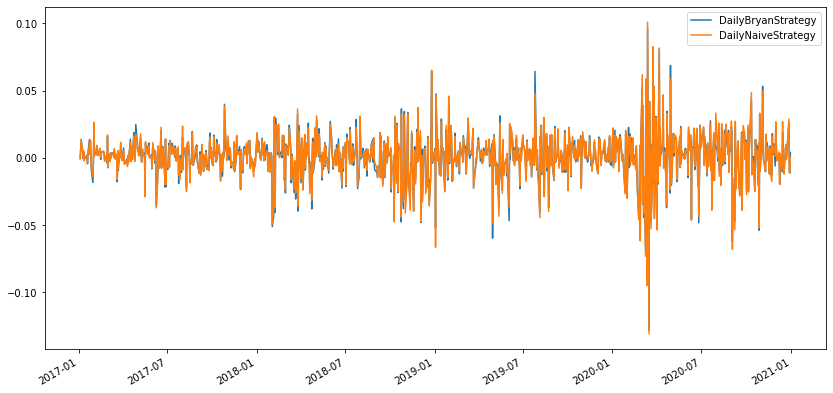

In [93]:
#Daily graphic visualization of two strategies

DailyBryanStrategy = Returns.dot(BryanAllocation)
DailyNaiveStrategy = Returns.dot(NaiveAllocation)


DailyStrategies = pd.concat([DailyBryanStrategy, DailyNaiveStrategy], axis =1)
DailyStrategies.columns = ['DailyBryanStrategy', 'DailyNaiveStrategy']

DailyStrategies.plot(figsize = (14,7))

Beta of the two strategies with NDX as a benchmark

In [163]:
NDX = ScalableMarketDf['2017-01-01':'2020-12-31'][['NDX']]


NDXReturns = np.log(NDX/NDX.shift(1))
NDXReturns = NDXReturns.reindex(SelectedDta.index)
NDXReturns = pd.Series(NDXReturns.values.T[0] , index = NDXReturns.index)


BetaBryanStrategy = DailyBryanStrategy.cov(NDXReturns)/NDXReturns.var()
BetaNaiveStrategy = DailyNaiveStrategy.cov(NDXReturns)/NDXReturns.var()

BetaNaiveStrategy > BetaBryanStrategy

True